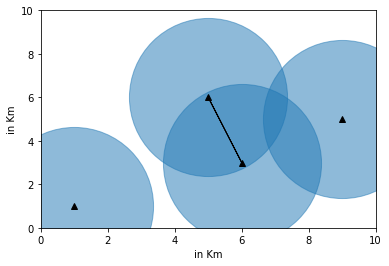

In [48]:
import matplotlib.pyplot as plt

# static host positions for testing purposes
x = [1, 5, 6, 9]
y = [1, 6, 3, 5]

# the values below corresponds to a distance in kilometers
width = 10 
height = 10

# figure dimensions
plt.axis([0, width, 0, height])

# figure labels
plt.xlabel("in Km")
plt.ylabel("in Km")

# plots
plt.plot(x, y, 'k^')
plt.arrow(x[1], y[1], 1, -3)
plt.scatter(x, y, s=25000, alpha=0.5)

plt.show()